In [7]:
#!/usr/bin/env python
# -*- coding: UTF-8 -*-
"""
@File    ：PressureLocationProcess.py
@Author  zhouxinyu
@Date    ：2022/3/31 14:35
"""
from math import tan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math


def cv_show(img):
    cv2.imshow('cv_show', img)
    cv2.waitKey(0)  # 等待时间，毫秒级，0标示按任意键终止
    cv2.destroyAllWindows()
    cv2.waitKey(1)  # 解决mac中窗口不关闭的问题


def showImages(images, titles=[''], size=[1, 1], BGR=False):
    for i in range(len(images)):
        plt.subplot(size[0], size[1], i + 1)
        showImage = images[i]
        if (BGR):
            b, g, r = cv2.split(images[i])
            showImage = cv2.merge([r, g, b])
        plt.imshow(showImage, 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])


# Get the picture in the right direction
def correct_direction(img, percentage):
    shape = img.shape
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    left_block = [gray_img[:, :int(percentage*shape[1])]]
    right_block = [gray_img[:,  int((1-percentage)*shape[1]):]]
    left_binarized = cv2.threshold(np.array(left_block), 1, 255, 0)[1]
    right_binarized = cv2.threshold(np.array(right_block), 1, 255, 0)[1]
    def get_sum(x):
        return sum(x)
    left_white_number = sum(list(map(get_sum, left_binarized[0])))
    right_white_number = sum(list(map(get_sum, right_binarized[0])))
    direction_flag = left_white_number > right_white_number
    if direction_flag:
        return img, left_white_number , right_white_number
    return cv2.flip(img, 1), left_white_number , right_white_number
    # return left_white_number > right_white_number, left_white_number , right_white_number



(263, 1859)


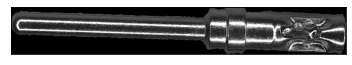

In [8]:
img = cv2.imread('/Users/zhouxinyu/Code/Python/jupyter/Project/ZF/压线筒污染/maxEdge/正常/2.png')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# showImages([img], BGR=True)
print(gray_img.shape)
p, p1, p2 = correct_direction(img, 0.2)
cv_show(p)
showImages([gray_img])

# correct_direction(img, 0.2)
# print("correct_direction: ", correct_direction(img, 0.2))
# showImages([])
# correct_direction(img, 0.2)

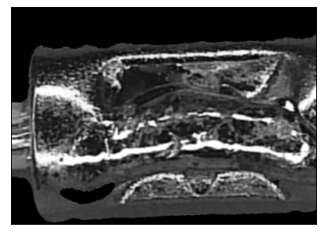

In [3]:
left = [gray_img[:, :int(0.2*gray_img.shape[1])]]
# print(sum(left[0]))
showImages(left)

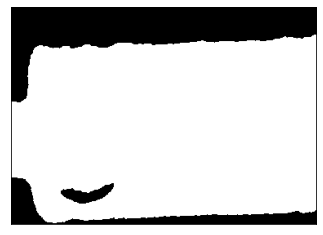

In [51]:
after_left = cv2.threshold(np.array(left), 1, 255, 0)[1]
showImages(after_left)

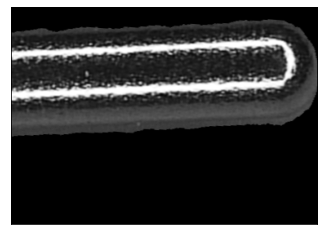

In [15]:
right = [gray_img[:,  int((1-0.2)*gray_img.shape[1]):]]
# print(sum(right[0]))
showImages(right)

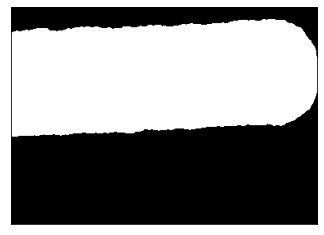

In [16]:
_, after_right = cv2.threshold(np.array(right), 1, 255, 0)
showImages(after_right)

In [55]:
def f(x):
    return sum(x)

r_right = map(f, after_right[0])
print("right-> ", sum(list(r_right))/255)

r_left = map(f, after_left[0])
print("left-> ", sum(list(r_left))/255)

right->  47187.0
left->  76134.0


In [37]:
sum(after_right[0][100])

95880

In [41]:
after_right[0][100]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [25]:
print(sum(sum(after_left[0])))

77.90588235294118


In [26]:
print(sum(sum(after_right[0]))/255)

192.42745098039217


In [ ]:
import cv2
import  numpy as np
img=cv2.imread('Resources/tom.jpg')#缩放
rows,cols,channels = img.shape
img=cv2.resize(img,None,fx=0.5,fy=0.5)
rows,cols,channels = img.shape#转换hsv
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower_blue=np.array([78,43,46])
upper_blue=np.array([124,255,255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)#这一步裁剪指定区域图片。
s = mask[30:200, 50:250] #y,x#起始x,y坐标，终止x,y坐标，而非加上宽和高# 和之前用到的cv2.boundingRect()函数定位法不同cv2.rectangle(img,(50,30),(250,200),(0,0,255),3)cv2.imshow('res',img)cv2.imshow('ss',s)#注意这里s已经是单通道，此时不返回通道值。x,y= s.shapebk = 0wt = 0#遍历二值图，为0则bk+1，否则wt+1for i in range(x):    for j in range(y):        if s[i,j]==0:            bk+=1        else:            wt+=1rate1 = wt/(x*y)rate2 = bk/(x*y)#round()第二个值为保留几位有效小数。print("白色占比:", round(rate1*100,2),'%')print("黑色占比:", round(rate2*100,2),'%')cv2.waitKey(0)